In [38]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
iris_dataset = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [24]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [25]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [27]:
#The dependant variable is already encoded, and there are no null values. Hence move on to logistic regression

X = df.iloc[:,:-1]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Logistic Model Accuracy: ", model.score(X_test, y_test)*100)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

Logistic Model Accuracy:  96.66666666666667


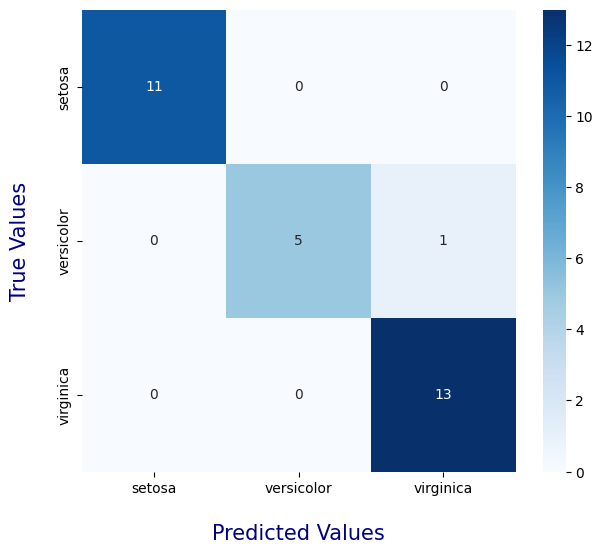

In [28]:
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
plt.xlabel('Predicted Values', c='navy', fontsize = 15, labelpad=20)
plt.ylabel('True Values', c='navy', fontsize = 15, labelpad=20 )
plt.show()

In [50]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [71]:
species = np.array(['setosa' 'versicolor' 'virginica'])
sample_values = np.array([3, 2, 4, 0.2]).reshape(1,-1)
print(sample_values)
sample_pred = model.predict(sample_values)
if sample_pred == 1:
    print("setosa")
elif sample_pred == 2:
    print("versicolor")
elif sample_pred == 3:
    print("virginica")

[[3.  2.  4.  0.2]]
setosa


/home/gautham/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
